In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
import folium

%matplotlib inline

### Importing First Dataset with Covid Cases and fatalities data

In [2]:
data1 = pd.read_csv('data/WHO-COVID-19-global-table-data.csv',index_col=False)

In [3]:
data1.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
0,Global,NaN,259502031,3329.279458,3980811,51.071786,611528,5183003,66.4953,52000,0.667134,7881
1,United States of America,Americas,47802459,14441.715000,666617,201.393000,100455,771529,233.0880,10338,3.123000,1367
2,India,South-East Asia,34555431,2504.009000,65808,4.769000,10549,467468,33.8740,2386,0.173000,488
3,Brazil,Americas,22043112,10370.330000,65451,30.792000,12930,613339,288.5490,1488,0.700000,273
4,The United Kingdom,Europe,10021501,14762.249000,299581,441.300000,46654,144433,212.7580,874,1.287000,147


In [4]:
data1.shape

(238, 12)

Slicing only required fields

In [5]:
data1_1 = data1.iloc[:,[0,1,2,3,7,8]]

In [6]:
data1_1.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population
0,Global,NaN,259502031,3329.279458,5183003,66.4953
1,United States of America,Americas,47802459,14441.715000,771529,233.0880
2,India,South-East Asia,34555431,2504.009000,467468,33.8740
3,Brazil,Americas,22043112,10370.330000,613339,288.5490
4,The United Kingdom,Europe,10021501,14762.249000,144433,212.7580


Updating names to standard names for mapping

In [7]:
string1 = "Palest"
string2 = "Kos"
data1_1[(data1_1["Name"].str.contains(string1)) 
        | (data1_1["Name"].str.contains(string2))]

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population
68,"occupied Palestinian territory, including east...",Eastern Mediterranean,459479,9006.895,4789,93.876
102,Kosovo[1],Europe,161006,8966.367,2973,165.565


In [8]:
#dataframe.replace("old string", "new string")
data1_1["Name_New"] = np.where(data1_1["Name"].str.contains(string1),'occupied Palestinian territory', data1_1["Name"])
data1_1["Name_New"] = np.where(data1_1["Name"].str.contains(string2),'Kosovo', data1_1["Name_New"])

<ipython-input-8-8e09a8812aad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1["Name_New"] = np.where(data1_1["Name"].str.contains(string1),'occupied Palestinian territory', data1_1["Name"])
<ipython-input-8-8e09a8812aad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1_1["Name_New"] = np.where(data1_1["Name"].str.contains(string2),'Kosovo', data1_1["Name_New"])


In [9]:
data1_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Name                                             238 non-null    object 
 1   WHO Region                                       237 non-null    object 
 2   Cases - cumulative total                         238 non-null    int64  
 3   Cases - cumulative total per 100000 population   237 non-null    float64
 4   Deaths - cumulative total                        238 non-null    int64  
 5   Deaths - cumulative total per 100000 population  237 non-null    float64
 6   Name_New                                         238 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 13.1+ KB


### Second Dataset Load - For Vaccination related data

In [10]:
data2 = pd.read_csv('data/vaccination-data.csv',index_col=False)

In [11]:
data2.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2021-11-23,4331275,3832341.0,11.126,9.845,3499948.0,8.991,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2021-02-22,4.0
1,Albania,ALB,EURO,REPORTING,2021-11-21,2006988,1064233.0,69.700,37.395,942755.0,33.126,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0
2,Algeria,DZA,AFRO,REPORTING,2021-11-22,12032500,6703364.0,27.439,15.287,5314016.0,12.118,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0
3,American Samoa,ASM,WPRO,REPORTING,2021-11-24,66691,35229.0,120.824,63.824,31158.0,56.449,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0
4,Andorra,AND,EURO,REPORTING,2021-10-31,104534,54999.0,135.300,72.199,49535.0,65.026,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0


In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               228 non-null    object 
 1   ISO3                                  228 non-null    object 
 2   WHO_REGION                            228 non-null    object 
 3   DATA_SOURCE                           228 non-null    object 
 4   DATE_UPDATED                          228 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    int64  
 6   PERSONS_VACCINATED_1PLUS_DOSE         223 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  223 non-null    float64
 9   PERSONS_FULLY_VACCINATED              224 non-null    float64
 10  PERSONS_FULLY_VACCINATED_PER100       224 non-null    float64
 11  VACCINES_USED      

selecting required columns

In [13]:
data2_1 = data2.iloc[:,[0,1,2,5,7,12,13]]

In [14]:
data2_1.head()

,COUNTRY,ISO3,WHO_REGION,TOTAL_VACCINATIONS,TOTAL_VACCINATIONS_PER100,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,4331275,11.126,2021-02-22,4.0
1,Albania,ALB,EURO,2006988,69.700,2021-01-13,5.0
2,Algeria,DZA,AFRO,12032500,27.439,2021-01-30,4.0
3,American Samoa,ASM,WPRO,66691,120.824,2020-12-21,3.0
4,Andorra,AND,EURO,104534,135.300,2021-01-20,3.0


In [15]:
data2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COUNTRY                     228 non-null    object 
 1   ISO3                        228 non-null    object 
 2   WHO_REGION                  228 non-null    object 
 3   TOTAL_VACCINATIONS          228 non-null    int64  
 4   TOTAL_VACCINATIONS_PER100   228 non-null    float64
 5   FIRST_VACCINE_DATE          208 non-null    object 
 6   NUMBER_VACCINES_TYPES_USED  225 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 12.6+ KB


changing to date format and calculating no. of days since first vaccine

In [16]:
data2_1["FIRST_VACCINE_DATE"] = pd.to_datetime(data2_1["FIRST_VACCINE_DATE"], format='%Y-%m-%d')

<ipython-input-16-e4e61d94b280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_1["FIRST_VACCINE_DATE"] = pd.to_datetime(data2_1["FIRST_VACCINE_DATE"], format='%Y-%m-%d')


In [17]:
data2_1["Reference Date"] = pd.to_datetime('2021-11-25', format='%Y-%m-%d')

<ipython-input-17-2378ed4d2f10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_1["Reference Date"] = pd.to_datetime('2021-11-25', format='%Y-%m-%d')


In [18]:
data2_1["Days Since First Vaccine"] = (data2_1["Reference Date"] - data2_1["FIRST_VACCINE_DATE"]).dt.days

<ipython-input-18-2897b985c892>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2_1["Days Since First Vaccine"] = (data2_1["Reference Date"] - data2_1["FIRST_VACCINE_DATE"]).dt.days


### Merging 1st (Covid Cases & Fatalities) and 2nd Dataset (Vaccination)

In [19]:
mergedDf1 = data2_1.merge(data1_1, left_on='COUNTRY', right_on='Name_New', how= 'left')

In [20]:
mergedDf1.head()

,COUNTRY,ISO3,WHO_REGION,TOTAL_VACCINATIONS,TOTAL_VACCINATIONS_PER100,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,Reference Date,Days Since First Vaccine,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Name_New
0,Afghanistan,AFG,EMRO,4331275,11.126,2021-02-22,4.0,2021-11-25,276.0,Afghanistan,Eastern Mediterranean,157144.0,403.675,7307.0,18.770,Afghanistan
1,Albania,ALB,EURO,2006988,69.700,2021-01-13,5.0,2021-11-25,316.0,Albania,Europe,198292.0,6890.402,3068.0,106.609,Albania
2,Algeria,DZA,AFRO,12032500,27.439,2021-01-30,4.0,2021-11-25,299.0,Algeria,Africa,209624.0,478.037,6041.0,13.776,Algeria
3,American Samoa,ASM,WPRO,66691,120.824,2020-12-21,3.0,2021-11-25,339.0,American Samoa,Western Pacific,5.0,9.058,0.0,0.000,American Samoa
4,Andorra,AND,EURO,104534,135.300,2021-01-20,3.0,2021-11-25,309.0,Andorra,Europe,16566.0,21440.497,131.0,169.546,Andorra


In [21]:
# Dropping unwanted columns
mergedDf1_1 = mergedDf1.drop(["Name","Name_New","Reference Date","FIRST_VACCINE_DATE"],axis = 1)

In [22]:
mergedDf1_1.head()

,COUNTRY,ISO3,WHO_REGION,TOTAL_VACCINATIONS,TOTAL_VACCINATIONS_PER100,NUMBER_VACCINES_TYPES_USED,Days Since First Vaccine,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population
0,Afghanistan,AFG,EMRO,4331275,11.126,4.0,276.0,Eastern Mediterranean,157144.0,403.675,7307.0,18.770
1,Albania,ALB,EURO,2006988,69.700,5.0,316.0,Europe,198292.0,6890.402,3068.0,106.609
2,Algeria,DZA,AFRO,12032500,27.439,4.0,299.0,Africa,209624.0,478.037,6041.0,13.776
3,American Samoa,ASM,WPRO,66691,120.824,3.0,339.0,Western Pacific,5.0,9.058,0.0,0.000
4,Andorra,AND,EURO,104534,135.300,3.0,309.0,Europe,16566.0,21440.497,131.0,169.546


In [23]:
# Renaming columns for better understanding
mergedDf1_1.rename(columns = {'COUNTRY':'Country Name'
                              ,'ISO3':'Country Code'
                              ,'WHO_REGION':'WHO Region Code'
                              ,'TOTAL_VACCINATIONS':'Total Vaccinations'
                              ,'TOTAL_VACCINATIONS_PER100':'Total Vaccinations Per 100'
                              ,'NUMBER_VACCINES_TYPES_USED':'No. of Vaccines Types Used'
                             }, inplace = True)

In [24]:
mergedDf1_1.head()

,Country Name,Country Code,WHO Region Code,Total Vaccinations,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population
0,Afghanistan,AFG,EMRO,4331275,11.126,4.0,276.0,Eastern Mediterranean,157144.0,403.675,7307.0,18.770
1,Albania,ALB,EURO,2006988,69.700,5.0,316.0,Europe,198292.0,6890.402,3068.0,106.609
2,Algeria,DZA,AFRO,12032500,27.439,4.0,299.0,Africa,209624.0,478.037,6041.0,13.776
3,American Samoa,ASM,WPRO,66691,120.824,3.0,339.0,Western Pacific,5.0,9.058,0.0,0.000
4,Andorra,AND,EURO,104534,135.300,3.0,309.0,Europe,16566.0,21440.497,131.0,169.546


In [25]:
mergedDf1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country Name                                     228 non-null    object 
 1   Country Code                                     228 non-null    object 
 2   WHO Region Code                                  228 non-null    object 
 3   Total Vaccinations                               228 non-null    int64  
 4   Total Vaccinations Per 100                       228 non-null    float64
 5   No. of Vaccines Types Used                       225 non-null    float64
 6   Days Since First Vaccine                         208 non-null    float64
 7   WHO Region                                       227 non-null    object 
 8   Cases - cumulative total                         227 non-null    float64
 9   Cases - cumulative total per 100

In [26]:
mergedDf1_1[mergedDf1_1["WHO Region"].isnull()==True]

,Country Name,Country Code,WHO Region Code,Total Vaccinations,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population
26,"Bonaire, Sint Eustatius and Saba",BES,AMRO,7391,28.441,2.0,276.0,NaN,NaN,NaN,NaN,NaN


In [27]:
#Removing data for BES country code as it is a combination of 3 countries
mergedDf1_1.drop(mergedDf1_1[mergedDf1_1["Country Code"]=="BES"].index, inplace = True)

### Loading 3rd Dataset having latest country population information

In [28]:
data3 = pd.read_csv('data/API_SP.POP.TOTL_DS2_en_csv_v2_3158886.csv',index_col=False,skiprows=4)

In [29]:
data3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN


In [30]:
data3_1 = data3[["Country Name","Country Code","2020"]]

In [31]:
data3_1.head()

,Country Name,Country Code,2020
0,Aruba,ABW,106766.0
1,Africa Eastern and Southern,AFE,677243299.0
2,Afghanistan,AFG,38928341.0
3,Africa Western and Central,AFW,458803476.0
4,Angola,AGO,32866268.0


In [32]:
data3_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2020          264 non-null    float64
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [33]:
data3_1[data3_1["2020"].isnull()==True]

,Country Name,Country Code,2020
69,Eritrea,ERI,NaN
110,Not classified,INX,NaN


In [34]:
del data3_1["Country Name"]

In [35]:
data3_1.columns = ["Country Code","Total Population(2020)"]                  

In [36]:
data3_1.head()

,Country Code,Total Population(2020)
0,ABW,106766.0
1,AFE,677243299.0
2,AFG,38928341.0
3,AFW,458803476.0
4,AGO,32866268.0


### Merging Cases & Vaccine data with population data

In [37]:
mergedDf1_2 = mergedDf1_1.merge(data3_1,on='Country Code', how= 'left')

In [38]:
mergedDf1_2.head()

,Country Name,Country Code,WHO Region Code,Total Vaccinations,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Total Population(2020)
0,Afghanistan,AFG,EMRO,4331275,11.126,4.0,276.0,Eastern Mediterranean,157144.0,403.675,7307.0,18.770,38928341.0
1,Albania,ALB,EURO,2006988,69.700,5.0,316.0,Europe,198292.0,6890.402,3068.0,106.609,2837743.0
2,Algeria,DZA,AFRO,12032500,27.439,4.0,299.0,Africa,209624.0,478.037,6041.0,13.776,43851043.0
3,American Samoa,ASM,WPRO,66691,120.824,3.0,339.0,Western Pacific,5.0,9.058,0.0,0.000,55197.0
4,Andorra,AND,EURO,104534,135.300,3.0,309.0,Europe,16566.0,21440.497,131.0,169.546,77265.0


In [39]:
mergedDf1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country Name                                     227 non-null    object 
 1   Country Code                                     227 non-null    object 
 2   WHO Region Code                                  227 non-null    object 
 3   Total Vaccinations                               227 non-null    int64  
 4   Total Vaccinations Per 100                       227 non-null    float64
 5   No. of Vaccines Types Used                       224 non-null    float64
 6   Days Since First Vaccine                         207 non-null    float64
 7   WHO Region                                       227 non-null    object 
 8   Cases - cumulative total                         227 non-null    float64
 9   Cases - cumulative total per 100

In [40]:
mergedDf1_2[mergedDf1_2["Total Population(2020)"].isnull()==True]

,Country Name,Country Code,WHO Region Code,Total Vaccinations,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Total Population(2020)
6,Anguilla,AIA,AMRO,19066,127.090,2.0,293.0,Americas,1334.0,8892.148,3.0,19.997,NaN
25,Bonaire,XAA,AMRO,31751,151.810,NaN,NaN,Americas,2760.0,13196.271,22.0,105.188,NaN
46,Cook Islands,COK,WPRO,24346,138.613,1.0,192.0,Western Pacific,0.0,0.000,0.0,0.000,NaN
66,Falkland Islands (Malvinas),FLK,AMRO,4407,126.529,1.0,NaN,Americas,79.0,2268.160,0.0,0.000,NaN
71,French Guiana,GUF,AMRO,165026,55.251,2.0,316.0,Americas,45802.0,15334.704,325.0,108.811,NaN
82,Guadeloupe,GLP,AMRO,266496,66.603,5.0,321.0,Americas,55080.0,13765.733,823.0,205.686,NaN
85,Guernsey,GGY,EURO,104131,161.524,3.0,NaN,Europe,3598.0,5581.063,23.0,35.677,NaN
103,Jersey,JEY,EURO,181102,168.004,3.0,NaN,Europe,13518.0,12540.354,80.0,74.214,NaN
127,Martinique,MTQ,AMRO,267746,71.349,1.0,NaN,Americas,45010.0,11994.191,707.0,188.400,NaN
135,Montserrat,MSR,AMRO,2949,58.992,1.0,290.0,Americas,44.0,880.176,1.0,20.004,NaN


In [41]:
#Calculating population from covid data
mergedDf1_2["Total Population Calc"] = (mergedDf1_2["Cases - cumulative total"]
                             /mergedDf1_2["Cases - cumulative total per 100000 population"])*100000

In [42]:
#Inserting caculated population data for null values in Actual Population data
mergedDf1_2["Total Population(2020)_new"] = np.where((mergedDf1_2["Total Population(2020)"].isnull()==True) 
                                                     & (mergedDf1_2["Total Population Calc"].isnull()==False)
                                                    ,mergedDf1_2["Total Population Calc"],mergedDf1_2["Total Population(2020)"])

In [43]:
mergedDf1_2[mergedDf1_2["Total Population(2020)_new"].isnull()==True]

,Country Name,Country Code,WHO Region Code,Total Vaccinations,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Total Population(2020),Total Population Calc,Total Population(2020)_new
46,Cook Islands,COK,WPRO,24346,138.613,1.0,192.0,Western Pacific,0.0,0.0,0.0,0.0,NaN,NaN,NaN
148,Niue,NIU,WPRO,2352,145.365,1.0,170.0,Western Pacific,0.0,0.0,0.0,0.0,NaN,NaN,NaN
161,Pitcairn Islands,PCN,WPRO,74,148.000,1.0,192.0,Western Pacific,0.0,0.0,0.0,0.0,NaN,NaN,NaN
172,Saint Helena,SHN,AFRO,7892,129.995,1.0,NaN,Africa,0.0,0.0,0.0,0.0,NaN,NaN,NaN
205,Tokelau,TKL,WPRO,1936,143.407,1.0,128.0,Western Pacific,0.0,0.0,0.0,0.0,NaN,NaN,NaN


inserting population values calculated from vaccine data into the null values of actual population data

In [44]:
mergedDf1_2["Total Population"] = np.where((mergedDf1_2["Total Population(2020)_new"].isnull()==True) 
                                                    ,100*(mergedDf1_2["Total Vaccinations"]/mergedDf1_2["Total Vaccinations Per 100"])
                                                      ,mergedDf1_2["Total Population(2020)_new"])

In [45]:
mergedDf1_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country Name                                     227 non-null    object 
 1   Country Code                                     227 non-null    object 
 2   WHO Region Code                                  227 non-null    object 
 3   Total Vaccinations                               227 non-null    int64  
 4   Total Vaccinations Per 100                       227 non-null    float64
 5   No. of Vaccines Types Used                       224 non-null    float64
 6   Days Since First Vaccine                         207 non-null    float64
 7   WHO Region                                       227 non-null    object 
 8   Cases - cumulative total                         227 non-null    float64
 9   Cases - cumulative total per 100

In [46]:
#dropping unnecessary columns 
del mergedDf1_2["Total Population(2020)_new"]
del mergedDf1_2["Total Population(2020)"]
del mergedDf1_2["Total Population Calc"]

### Loading GDP Per Capita (Current US $)

In [47]:
data4 = pd.read_csv('data/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_3159040.csv',index_col=False,skiprows=4)
data4.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,147.836769,147.238537,156.426780,182.521139,162.594548,180.489043,...,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232,NaN
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,...,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409,NaN
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,...,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800,NaN
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869,NaN


In [48]:
#dropping unwanted columns
data4_1 = data4.drop(["Country Name","Indicator Name","Indicator Code","Unnamed: 65"],axis = 1)

In [49]:
data4_1.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.013919,24712.493263,26441.619936,26893.011506,28396.908423,28452.170615,29350.805019,30253.279358,NaN,NaN
1,AFE,147.836769,147.238537,156.426780,182.521139,162.594548,180.489043,191.135790,192.629742,204.317426,...,1686.695763,1672.363658,1653.188436,1658.650062,1507.800256,1404.953164,1540.232473,1534.171767,1485.307425,1330.140232
2,AFG,59.773234,59.860900,58.458009,78.706429,82.095307,101.108325,137.594298,160.898434,129.108311,...,591.162798,641.871438,637.165464,613.856505,578.466353,509.220100,519.888913,493.756581,507.103392,508.808409
3,AFW,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,144.368395,128.620051,129.678996,...,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869


In [50]:
#Filling the latest non-null value from columns
data4_1['GDP Per Capita'] = data4_1.iloc[:, 1:].ffill(axis=1).iloc[:, -1]

In [51]:
data4_2= data4_1[["Country Code","GDP Per Capita"]]
data4_2.head()

,Country Code,GDP Per Capita
0,ABW,30253.279358
1,AFE,1330.140232
2,AFG,508.808409
3,AFW,1714.426800
4,AGO,1895.770869


### Merging Cases, vaccine, population and GDP per capita data

In [52]:
mergedDf1_3 = mergedDf1_2.merge(data4_2,on='Country Code', how= 'left')

In [53]:
mergedDf1_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 0 to 226
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country Name                                     227 non-null    object 
 1   Country Code                                     227 non-null    object 
 2   WHO Region Code                                  227 non-null    object 
 3   Total Vaccinations                               227 non-null    int64  
 4   Total Vaccinations Per 100                       227 non-null    float64
 5   No. of Vaccines Types Used                       224 non-null    float64
 6   Days Since First Vaccine                         207 non-null    float64
 7   WHO Region                                       227 non-null    object 
 8   Cases - cumulative total                         227 non-null    float64
 9   Cases - cumulative total per 100

In [54]:
mergedDf1_3.describe()

,Total Vaccinations,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,Cases - cumulative total,Cases - cumulative total per 100000 population,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Total Population,GDP Per Capita
count,2.270000e+02,227.000000,224.000000,207.000000,2.270000e+02,227.000000,227.000000,227.000000,2.270000e+02,208.000000
mean,3.393327e+07,93.116731,3.812500,281.545894,1.142735e+06,5780.326291,22829.246696,88.500229,3.388905e+07,17121.167467
std,1.840455e+08,58.317369,1.826714,50.977118,4.368314e+06,5713.329298,80382.088193,99.294852,1.357163e+08,27096.067305
min,7.400000e+01,0.012000,1.000000,38.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000e+01,274.009523
25%,2.659260e+05,43.264000,2.000000,255.000000,1.282200e+04,457.888000,144.500000,6.924500,3.988725e+05,2233.260385
50%,1.730365e+06,96.657000,4.000000,281.000000,1.067940e+05,4683.340000,1732.000000,53.020000,5.518092e+06,6269.051176
75%,1.155442e+07,141.150000,5.000000,322.000000,5.633205e+05,9270.492500,10485.500000,148.153000,2.057706e+07,20025.773443
max,2.433028e+09,286.103000,10.000000,491.000000,4.780246e+07,24838.790000,771529.000000,609.493000,1.402112e+09,190512.737442


### Null Value Treatment - Filling NAs with Mean, Mode or removal

In [55]:
#Filling NAs with mean value
mergedDf1_3['Days Since First Vaccine'] = mergedDf1_3['Days Since First Vaccine'].fillna(mergedDf1_3['Days Since First Vaccine'].mean())

In [56]:
#Filling NAs with Mode (Most frequent value)
mergedDf1_3['No. of Vaccines Types Used'] = mergedDf1_3['No. of Vaccines Types Used'].fillna(mergedDf1_3['No. of Vaccines Types Used'].mode()[0])

In [57]:
#Dropping NAs
mergedDf1_4 = mergedDf1_3.dropna().reset_index(drop=True)

In [58]:
mergedDf1_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Country Name                                     208 non-null    object 
 1   Country Code                                     208 non-null    object 
 2   WHO Region Code                                  208 non-null    object 
 3   Total Vaccinations                               208 non-null    int64  
 4   Total Vaccinations Per 100                       208 non-null    float64
 5   No. of Vaccines Types Used                       208 non-null    float64
 6   Days Since First Vaccine                         208 non-null    float64
 7   WHO Region                                       208 non-null    object 
 8   Cases - cumulative total                         208 non-null    float64
 9   Cases - cumulative total per 100

Checking statistics of dataset

In [59]:
mergedDf1_4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total Vaccinations,208.0,3.702704e+07,1.920076e+08,1438.000000,4.379752e+05,2.613330e+06,1.311806e+07,2.433028e+09
Total Vaccinations Per 100,208.0,8.981774e+01,5.782937e+01,0.012000,3.692750e+01,9.112750e+01,1.388508e+02,2.449270e+02
No. of Vaccines Types Used,208.0,3.975962e+00,1.767774e+00,1.000000,3.000000e+00,4.000000e+00,5.000000e+00,1.000000e+01
Days Since First Vaccine,208.0,2.833510e+02,4.808822e+01,38.000000,2.597500e+02,2.812729e+02,3.200000e+02,4.910000e+02
Cases - cumulative total,208.0,1.246265e+06,4.550271e+06,0.000000,1.730775e+04,1.537575e+05,6.478658e+05,4.780246e+07
Cases - cumulative total per 100000 population,208.0,5.729879e+03,5.634525e+03,0.000000,4.659310e+02,4.693081e+03,9.173244e+03,2.483879e+04
Deaths - cumulative total,208.0,2.490438e+04,8.368180e+04,0.000000,2.360000e+02,2.206500e+03,1.159100e+04,7.715290e+05
Deaths - cumulative total per 100000 population,208.0,9.063836e+01,1.003573e+02,0.000000,7.672500e+00,5.787600e+01,1.515060e+02,6.094930e+02
Total Population,208.0,3.697797e+07,1.414036e+08,10834.000000,1.117124e+06,6.889756e+06,2.642017e+07,1.402112e+09
GDP Per Capita,208.0,1.712117e+04,2.709607e+04,274.009523,2.233260e+03,6.269051e+03,2.002577e+04,1.905127e+05


In [60]:
mergedDf1_4.columns = ['Country Name', 'Country Code', 'WHO Region Code', 'Total Vaccinations',
       'Total Vaccinations Per 100', 'No. of Vaccines Types Used',
       'Days Since First Vaccine', 'WHO Region', 'Cases total',
       'Cases total per 100000 pop.',
       'Deaths total',
       'Deaths total per 100000 pop.', 'Total Population',
       'GDP Per Capita']

In [61]:
continuous_features = ['Total Vaccinations Per 100',
                       'No. of Vaccines Types Used',
                       'Days Since First Vaccine',
                       'Cases total per 100000 pop.',
                       'Deaths total per 100000 pop.',
                       'GDP Per Capita']

In [62]:
categorical_features = ['WHO Region Code']

In [63]:
df_final = pd.concat([mergedDf1_4[continuous_features],mergedDf1_4[categorical_features]],axis=1)

In [64]:
df_final.head()

,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,Cases total per 100000 pop.,Deaths total per 100000 pop.,GDP Per Capita,WHO Region Code
0,11.126,4.0,276.0,403.675,18.770,508.808409,EMRO
1,69.700,5.0,316.0,6890.402,106.609,5215.276752,EURO
2,27.439,4.0,299.0,478.037,13.776,3310.386534,AFRO
3,120.824,3.0,339.0,9.058,0.000,11534.567544,WPRO
4,135.300,3.0,309.0,21440.497,169.546,40897.330873,EURO


### To use categorical features, we need to convert them to binary

In [65]:
for col in categorical_features:
    dummies = pd.get_dummies(df_final[col],prefix=col)
    df_final = pd.concat([df_final,dummies], axis =1)
    df_final.drop(col, axis=1, inplace = True)

In [66]:
df_final.head()

,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,Cases total per 100000 pop.,Deaths total per 100000 pop.,GDP Per Capita,WHO Region Code_AFRO,WHO Region Code_AMRO,WHO Region Code_EMRO,WHO Region Code_EURO,WHO Region Code_OTHER,WHO Region Code_SEARO,WHO Region Code_WPRO
0,11.126,4.0,276.0,403.675,18.770,508.808409,0,0,1,0,0,0,0
1,69.700,5.0,316.0,6890.402,106.609,5215.276752,0,0,0,1,0,0,0
2,27.439,4.0,299.0,478.037,13.776,3310.386534,1,0,0,0,0,0,0
3,120.824,3.0,339.0,9.058,0.000,11534.567544,0,0,0,0,0,0,1
4,135.300,3.0,309.0,21440.497,169.546,40897.330873,0,0,0,1,0,0,0


To give equal importance to all features, we need to scale the continuous features using scikit-learn's MinMaxScaler as the feature matrix is a mix of both binary and continuous variables

In [67]:
mms = MinMaxScaler()
mms.fit(df_final)
data_transformed = mms.transform(df_final)

In [68]:
features = df_final.columns

Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

In [69]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\punit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


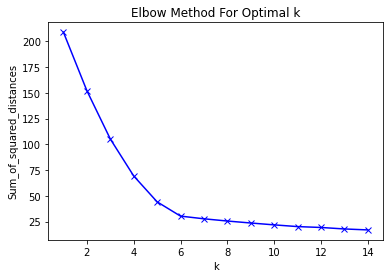

In [70]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From Elbow curve, k looks to be 6

Using silhouette method to confirm the optimum value of k

In [71]:
from sklearn.metrics import silhouette_score

sil = []
K = range(2,15)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in K:
  kmeans = KMeans(n_clusters = k).fit(data_transformed)
  labels = kmeans.labels_
  sil.append(silhouette_score(data_transformed, labels, metric = 'euclidean'))

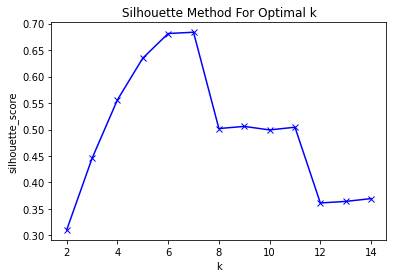

In [72]:
plt.plot(K,sil,'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

From Silhouette Method also, optimal k values looks like 6 as this looks like global maxima

In [73]:
kmeans = KMeans(n_clusters=6)
model = kmeans.fit(data_transformed)
print("model\n", model)

model
 KMeans(n_clusters=6)


In [74]:
centers = model.cluster_centers_
centers

array([[ 4.55525678e-01,  3.43915344e-01,  5.61318074e-01,
         2.76838975e-01,  2.32821456e-01,  9.18062925e-02,
         5.55111512e-17,  1.00000000e+00, -4.16333634e-17,
        -5.55111512e-17, -2.60208521e-18, -2.77555756e-17,
         5.55111512e-17],
       [ 1.05206864e-01,  2.17391304e-01,  4.56089836e-01,
         6.37661846e-02,  3.72482075e-02,  1.00091595e-02,
         1.00000000e+00,  1.38777878e-16, -4.16333634e-17,
        -5.55111512e-17, -2.60208521e-18, -6.93889390e-18,
         2.77555756e-17],
       [ 4.84408196e-01,  3.18518519e-01,  5.42163355e-01,
         9.79380249e-02,  4.71587587e-02,  7.64327824e-02,
         8.32667268e-17,  5.55111512e-17, -4.16333634e-17,
        -5.55111512e-17,  8.67361738e-19, -2.77555756e-17,
         1.00000000e+00],
       [ 4.70501518e-01,  3.19923372e-01,  5.87020140e-01,
         4.28363719e-01,  2.65372033e-01,  1.80899300e-01,
        -1.11022302e-16,  1.66533454e-16, -5.55111512e-17,
         9.82758621e-01,  1.72413793e

In [75]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [76]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'c','m','k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2,+2])
	plt.xticks(rotation=35)
	parallel_coordinates(data,'prediction', color = my_colors, marker='o')

In [77]:
P = pd_centers(features,centers )
P

,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,Cases total per 100000 pop.,Deaths total per 100000 pop.,GDP Per Capita,WHO Region Code_AFRO,WHO Region Code_AMRO,WHO Region Code_EMRO,WHO Region Code_EURO,WHO Region Code_OTHER,WHO Region Code_SEARO,WHO Region Code_WPRO,prediction
0,0.455526,0.343915,0.561318,0.276839,0.232821,0.091806,5.551115e-17,1.000000e+00,-4.163336e-17,-5.551115e-17,-2.602085e-18,-2.775558e-17,5.551115e-17,0
1,0.105207,0.217391,0.456090,0.063766,0.037248,0.010009,1.000000e+00,1.387779e-16,-4.163336e-17,-5.551115e-17,-2.602085e-18,-6.938894e-18,2.775558e-17,1
2,0.484408,0.318519,0.542163,0.097938,0.047159,0.076433,8.326673e-17,5.551115e-17,-4.163336e-17,-5.551115e-17,8.673617e-19,-2.775558e-17,1.000000e+00,2
3,0.470502,0.319923,0.587020,0.428364,0.265372,0.180899,-1.110223e-16,1.665335e-16,-5.551115e-17,9.827586e-01,1.724138e-02,2.775558e-17,0.000000e+00,3
4,0.297524,0.494949,0.557997,0.195697,0.095134,0.052678,-2.775558e-17,-5.551115e-17,1.000000e+00,-5.551115e-17,1.734723e-18,-2.081668e-17,2.775558e-17,4
5,0.393125,0.533333,0.551214,0.133294,0.054070,0.015972,-8.326673e-17,0.000000e+00,1.387779e-17,-5.551115e-17,0.000000e+00,1.000000e+00,2.775558e-17,5


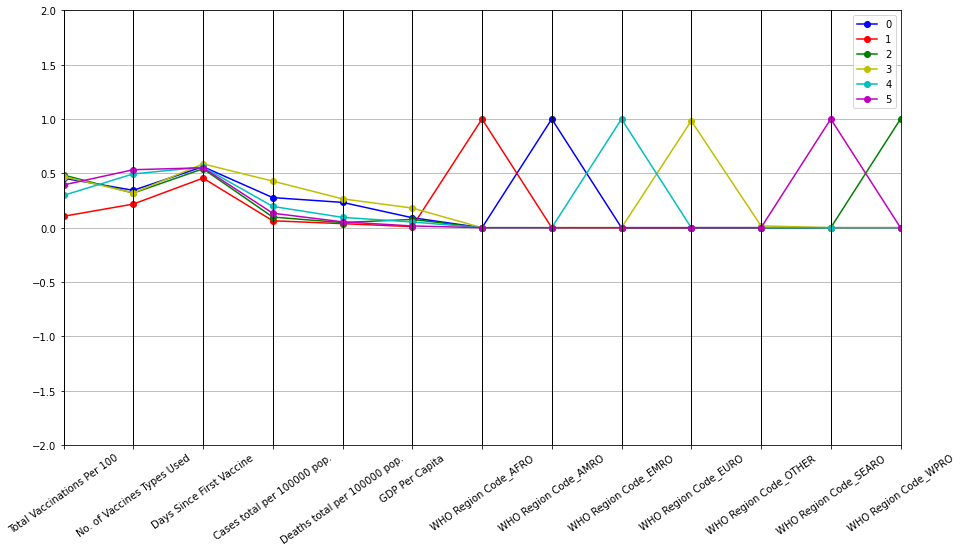

In [78]:
parallel_plot(P)

### From the graph above looks like the WHO Regions are coming out more significantly and creating seperate clusters. We need to again run the cluster analysis without the WHO Region feature

In [79]:
features = ['Total Vaccinations Per 100',
                       'No. of Vaccines Types Used',
                       'Days Since First Vaccine',
                       'Cases total per 100000 pop.',
                       'Deaths total per 100000 pop.',
                       'GDP Per Capita']

In [80]:
select_df = mergedDf1_4[features]

In [81]:
select_df.head()

,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,Cases total per 100000 pop.,Deaths total per 100000 pop.,GDP Per Capita
0,11.126,4.0,276.0,403.675,18.770,508.808409
1,69.700,5.0,316.0,6890.402,106.609,5215.276752
2,27.439,4.0,299.0,478.037,13.776,3310.386534
3,120.824,3.0,339.0,9.058,0.000,11534.567544
4,135.300,3.0,309.0,21440.497,169.546,40897.330873


Using Standard Scalar as there are only continuous features

In [82]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.36404015,  0.01363096, -0.15323337, -0.94756064, -0.71785234,
        -0.61457026],
       [-0.34872022,  0.58067902,  0.68057802,  0.20646329,  0.15952173,
        -0.44045559],
       [-1.08127111,  0.01363096,  0.32620818, -0.93433124, -0.76773458,
        -0.51092655],
       ...,
       [-1.51276561, -0.5534171 , -1.3414146 , -1.0134255 , -0.84027059,
        -0.60290547],
       [-1.46398782, -0.5534171 , -1.21634289, -0.81604672, -0.70609595,
        -0.594515  ],
       [-0.80664903,  0.01363096, -0.06985223, -0.85925248, -0.5892113 ,
        -0.59165562]])

Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

In [83]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\punit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Plotting Elbow Curve for optimum value of k (Cluster Counts)

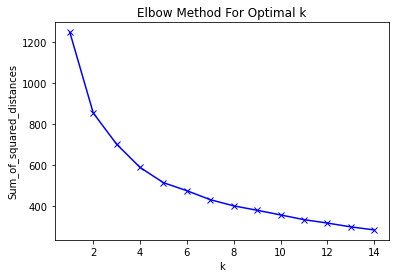

In [84]:
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

From above elbow curve looks like 2 is the optimum value of k

Using silhouette method to confirm the optimum value of k. The Silhouette Score reaches its global maximum at the optimal k

In [85]:
from sklearn.metrics import silhouette_score

sil = []
K = range(2,15)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in K:
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

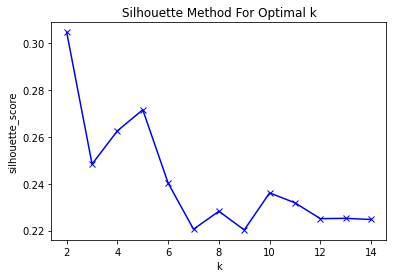

In [86]:
plt.plot(K,sil,'bx-')
plt.xlabel('k')
plt.ylabel('silhouette_score')
plt.title('Silhouette Method For Optimal k')
plt.show()

Global Maxima shows 2 as the optimum cluster numbers

### Use k-Means Clustering

In [87]:
kmeans = KMeans(n_clusters=2)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(n_clusters=2)


In [88]:
centers = model.cluster_centers_
centers

array([[-0.52509914,  0.00902082, -0.45623708, -0.63365146, -0.50104753,
        -0.4130137 ],
       [ 0.75984934, -0.01305365,  0.66020189,  0.91693093,  0.72504525,
         0.59765511]])

In [89]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [90]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	plt.xticks(rotation=5)
	parallel_coordinates(data,'prediction', color = my_colors, marker='o')

In [91]:
features = select_df.columns

In [92]:
P = pd_centers(features,centers )
P

,Total Vaccinations Per 100,No. of Vaccines Types Used,Days Since First Vaccine,Cases total per 100000 pop.,Deaths total per 100000 pop.,GDP Per Capita,prediction
0,-0.525099,0.009021,-0.456237,-0.633651,-0.501048,-0.413014,0
1,0.759849,-0.013054,0.660202,0.916931,0.725045,0.597655,1


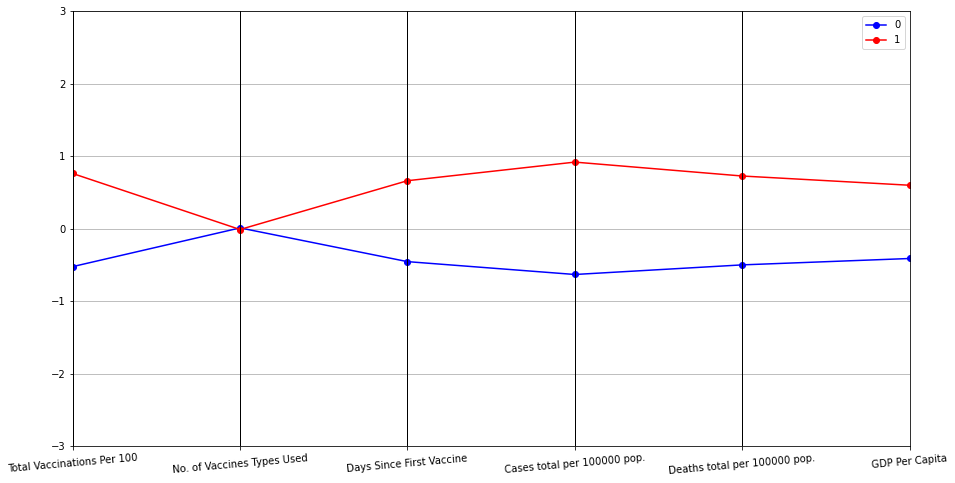

In [93]:
parallel_plot(P)

In [94]:
country_geo = 'world-countries.json'

In [95]:
plot_data1 = data2.iloc[:,[1,7]]

In [96]:
data_indicator = 'Total Vaccinations Per 100 people'

In [97]:
plot_data1.columns = ['CountryCode', 'Value']

In [98]:
map = folium.Map(location=[50, 50], zoom_start=1.49)

In [99]:
# choropleth maps bind Pandas Data Frames and json geometries.  This allows us to quickly visualize data combinations
folium.Choropleth(geo_data=country_geo, data=plot_data1,
             columns=['CountryCode', 'Value'],
             key_on='feature.id',
             fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
             legend_name=data_indicator).add_to(map)

In [100]:
map.save('plot_data1.html')

In [101]:
# Import the Folium interactive html file
from IPython.display import IFrame
IFrame(src='plot_data1.html', width=950, height=500)

In [102]:
plot_data2 = data2.iloc[:,[0,7]]

In [103]:
plot_data2 = plot_data2.sort_values(by='TOTAL_VACCINATIONS_PER100',ascending = False).reset_index(drop=True)

In [104]:
plot_top5 = plot_data2.head(5)
plot_top5.head()

,COUNTRY,TOTAL_VACCINATIONS_PER100
0,Gibraltar,286.103
1,Cuba,244.927
2,United Arab Emirates,220.237
3,Chile,207.375
4,Puerto Rico,194.819


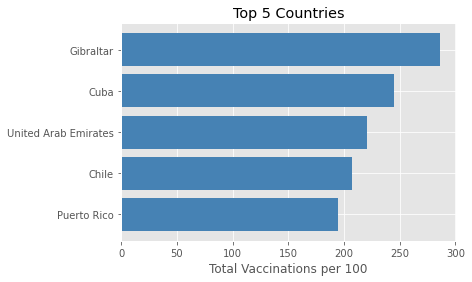

In [105]:
plt.style.use('ggplot')
plt.barh(plot_top5["COUNTRY"].values,plot_top5["TOTAL_VACCINATIONS_PER100"].values,color ='#4682B4')
plt.title('Top 5 Countries')
#plt.ylabel('Country')
plt.xlabel('Total Vaccinations per 100')
plt.gca().invert_yaxis()
plt.show()

In [106]:
plot_bottom5 = plot_data2.tail(5)
plot_bottom5.head()

,COUNTRY,TOTAL_VACCINATIONS_PER100
223,South Sudan,1.902
224,Chad,1.520
225,Haiti,1.390
226,Democratic Republic of the Congo,0.209
227,Burundi,0.012


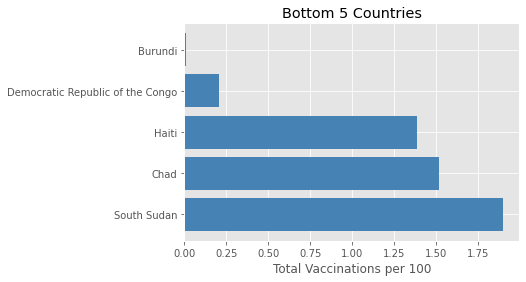

In [107]:
plt.style.use('ggplot')
plt.barh(plot_bottom5["COUNTRY"].values,plot_bottom5["TOTAL_VACCINATIONS_PER100"].values,color ='#4682B4')
plt.title('Bottom 5 Countries')
#plt.ylabel('Country')
plt.xlabel('Total Vaccinations per 100')
plt.show()